In [1]:
#1. What is the range of selling prices in the datasetD
import pandas as pd

# Load the dataset
url = "https://drive.google.com/uc?export=download&id=1iKy23bMtEQShF_weneRNnYrFmzvpPOI3"
df = pd.read_csv(url)


#print("Columns:", df.columns)

# Calculate range
min_price = df['selling_price'].min()
max_price = df['selling_price'].max()
price_range = max_price - min_price

print(f"Minimum Selling Price: ₹{min_price}")
print(f"Maximum Selling Price: ₹{max_price}")
print(f"Range of Selling Prices: ₹{price_range}")


Minimum Selling Price: ₹5000
Maximum Selling Price: ₹760000
Range of Selling Prices: ₹755000


In [2]:
# 2 What is the median selling price for bikes in the datasetD
median_price = df['selling_price'].median()
print(f"Median Selling Price: ₹{median_price}")


Median Selling Price: ₹45000.0


In [3]:
# 3 What is the most common seller typeD
most_common_seller = df['seller_type'].mode()[0]
print(f"Most Common Seller Type: {most_common_seller}")


Most Common Seller Type: Individual


In [4]:
# 4 How many bikes have driven more than 50,000 kilometersD
over_50k = df[df['km_driven'] > 50000].shape[0]
print(f"Bikes driven over 50,000 km: {over_50k}")


Bikes driven over 50,000 km: 170


In [5]:
# 5 What is the average km_driven value for each ownership typeD
avg_km_driven_by_ownership = df.groupby('owner')['km_driven'].mean()
print(avg_km_driven_by_ownership)

owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


In [6]:
# 6 What proportion of bikes are from the year 2015 or olderD
total_bikes = df.shape[0]

older_bikes = df[df['year'] <= 2015].shape[0]

# Proportion (as percentage)
proportion = (older_bikes / total_bikes) * 100

print(f"Proportion of bikes from 2015 or older: {proportion:.2f}%")


Proportion of bikes from 2015 or older: 56.64%


In [7]:
#7 What is the trend of missing values across the datasetD
missing_values = df.isnull().sum()

# Display only columns with missing values
missing_trend = missing_values[missing_values > 0]
print("Missing value trend:\n", missing_trend)


Missing value trend:
 ex_showroom_price    435
dtype: int64


In [8]:
# 8  What is the highest ex_showroom_price recorded, and for which bikeD
max_price = df['ex_showroom_price'].max()

# Get the bike(s) with this price
bike_info = df[df['ex_showroom_price'] == max_price][['name', 'ex_showroom_price']]

print("Bike(s) with highest ex-showroom price:\n", bike_info)


Bike(s) with highest ex-showroom price:
                            name  ex_showroom_price
134  Harley-Davidson Street Bob          1278000.0


In [9]:
# 9  What is the total number of bikes listed by each seller typeD
seller_counts = df['seller_type'].value_counts()

print("Bikes listed by each seller type:\n", seller_counts)


Bikes listed by each seller type:
 seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


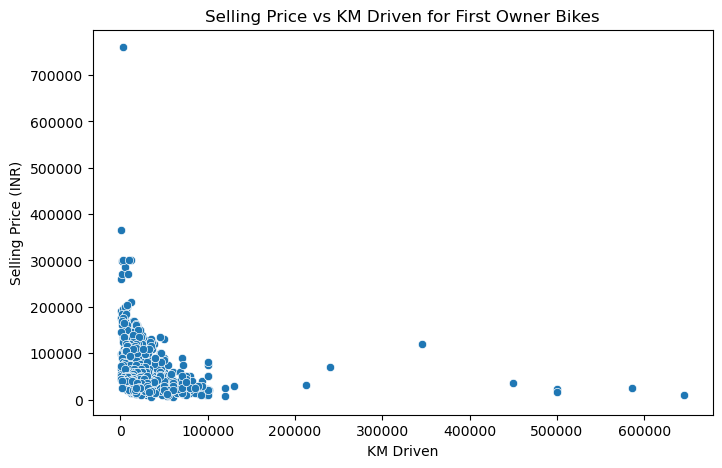

In [10]:
#10 What is the relationship between selling_price and km_driven for first-owner bikesD
import seaborn as sns
import matplotlib.pyplot as plt

# Filter first-owner bikes
first_owner_df = df[df['owner'].str.contains("1st", case=False)]

# Scatter plot: selling price vs km driven
plt.figure(figsize=(8, 5))
sns.scatterplot(x='km_driven', y='selling_price', data=first_owner_df)
plt.title("Selling Price vs KM Driven for First Owner Bikes")
plt.xlabel("KM Driven")
plt.ylabel("Selling Price (INR)")
plt.show()


In [11]:
# 11. Identify and remove outliers in the km_driven column using the IQR methodB
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_no_outliers = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

print(f"Original dataset size: {df.shape[0]}")
print(f"Dataset size after removing outliers in 'km_driven': {df_no_outliers.shape[0]}")


Original dataset size: 1061
Dataset size after removing outliers in 'km_driven': 1022


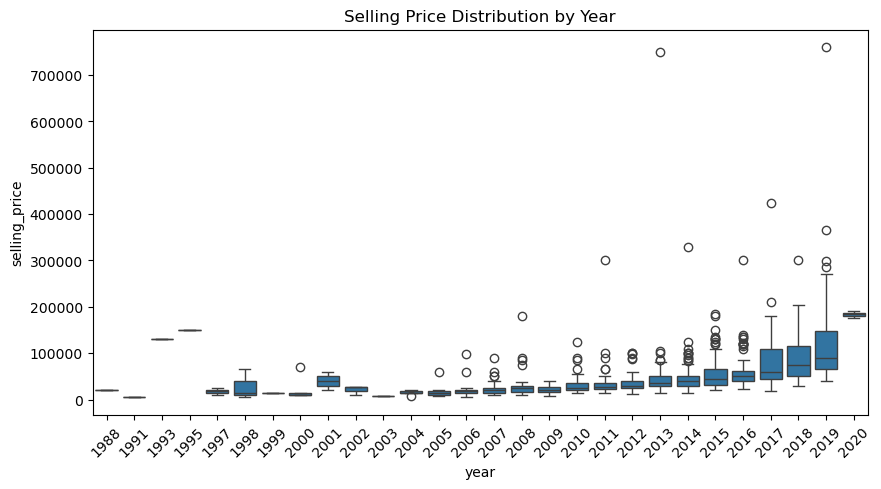

In [12]:
# 12. Perform a bivariate analysis to visualize the relationship between year and selling_pr
plt.figure(figsize=(10, 5))
sns.boxplot(x='year', y='selling_price', data=df)
plt.xticks(rotation=45)
plt.title("Selling Price Distribution by Year")
plt.show()


In [13]:
#13.  What is the average depreciation in selling price based on the bike's age (current year - manufacturingyear)
from datetime import datetime

# Assume current year is 2025
current_year = datetime.now().year

# Calculate age
df['bike_age'] = current_year - df['year']

# Calculate depreciation
df['depreciation'] = df['ex_showroom_price'] - df['selling_price']

# Average depreciation per year of age
avg_depreciation = df.groupby('bike_age')['depreciation'].mean()

print("Average depreciation by bike age:\n", avg_depreciation)


Average depreciation by bike age:
 bike_age
5    -34260.000000
6      2954.562500
7     13023.194805
8     22306.082353
9     28328.190476
10    28013.275000
11    34505.606061
12    43086.886792
13    37317.648649
14    47102.666667
15    45658.928571
16    38227.785714
17    54732.428571
18    42399.000000
19    39664.500000
20    44852.000000
21    36852.000000
22             NaN
23             NaN
24    34852.000000
25             NaN
26             NaN
27             NaN
28             NaN
30             NaN
32             NaN
34             NaN
37             NaN
Name: depreciation, dtype: float64


In [14]:
#14. Which bike names are priced significantly above the average price for their manufacturing yearD
avg_by_year = df.groupby('year')['selling_price'].mean().reset_index()
df = df.merge(avg_by_year, on='year', suffixes=('', '_year_avg'))

# Filter bikes significantly (> 50%) above average for their year
above_avg_bikes = df[df['selling_price'] > 1.5 * df['selling_price_year_avg']][['name', 'year', 'selling_price']]

print("Bikes priced significantly above average for their year:\n", above_avg_bikes)


Bikes priced significantly above average for their year:
                                      name  year  selling_price
2     Royal Enfield Classic Gunmetal Grey  2018         150000
7    Royal Enfield Bullet 350 [2007-2011]  2008         180000
13                          Yamaha YZF R3  2019         365000
18    Royal Enfield Classic Gunmetal Grey  2018         150000
23                          Jawa Standard  2019         180000
..                                    ...   ...            ...
979             Royal Enfield Thunder 500  2015         105000
981             Royal Enfield Thunder 350  2013         105000
983             Royal Enfield Classic 350  2015         100000
984             Royal Enfield Classic 500  2014          95000
985             Royal Enfield Classic 500  2011          90000

[157 rows x 3 columns]


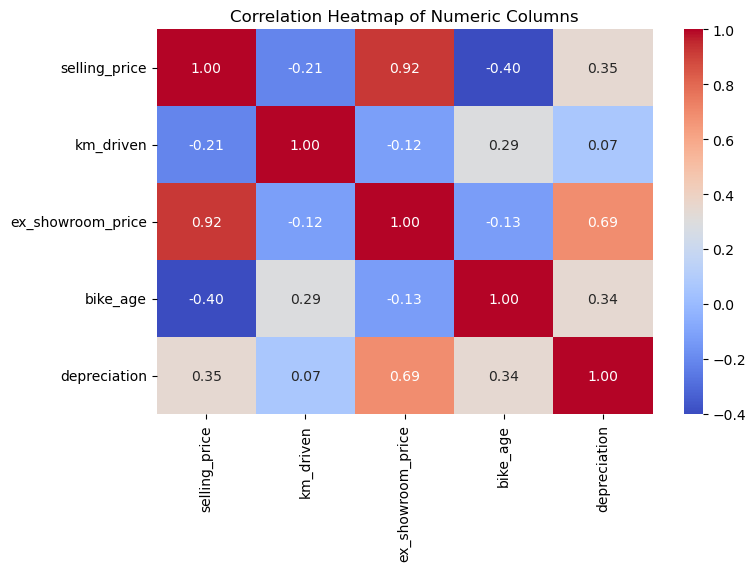

In [15]:
#15 Develop a correlation matrix for numeric columns and visualize it using a heatmap.
corr = df[['selling_price', 'km_driven', 'ex_showroom_price', 'bike_age', 'depreciation']].corr()

# Heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numeric Columns")
plt.show()


# EDA-2

1. Average selling price per dealer:
Dealer_Name
U-Haul CO                                          28769.919006
Classic Chevy                                      28602.014446
Rabun Used Car Sales                               28527.536177
Iceberg Rentals                                    28522.958533
Enterprise Rent A Car                              28312.580800
Scrivener Performance Engineering                  28297.371589
Gartner Buick Hyundai Saab                         28247.621019
Saab-Belle Dodge                                   28190.139888
Capitol KIA                                        28189.703822
Race Car Help                                      28163.372706
Chrysler of Tri-Cities                             28123.091054
Star Enterprises Inc                               28113.055244
Suburban Ford                                      28112.206758
C & M Motors Inc                                   28111.755200
Tri-State Mack Inc                                 2809

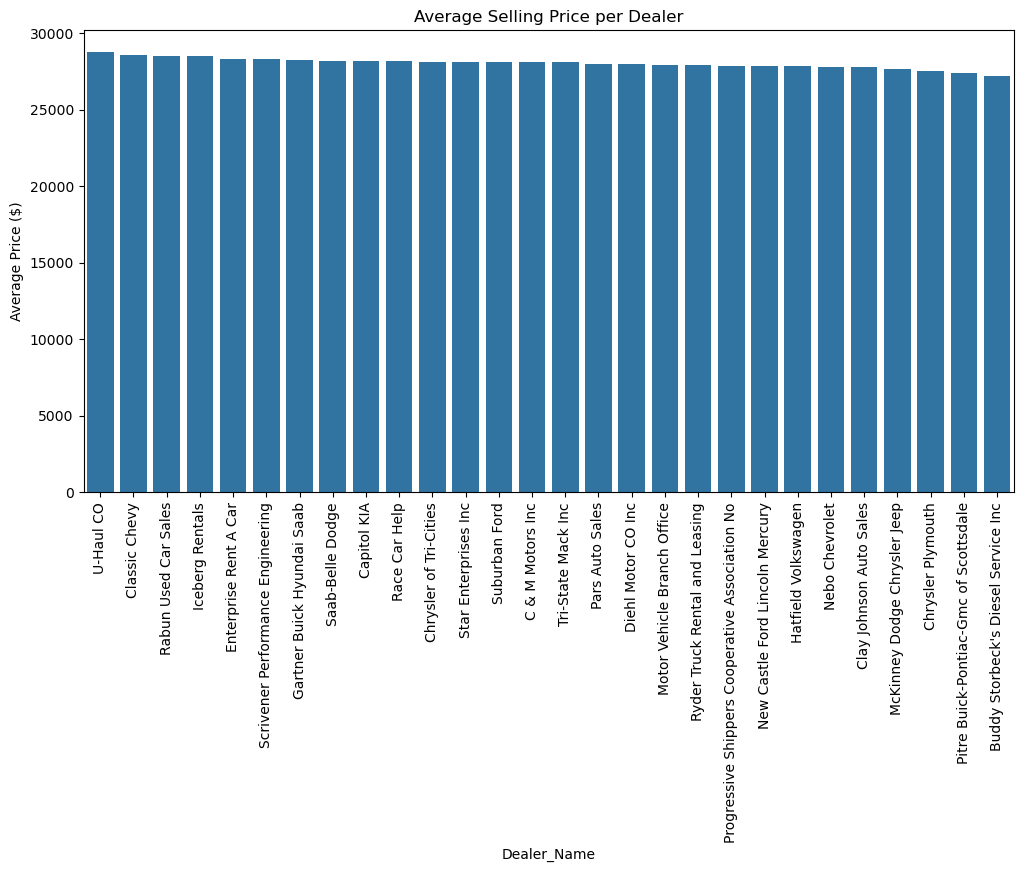

In [16]:

url = 'https://drive.google.com/uc?id=1N0kM_zi-iU3yvr6BEJf21aiF599PtA0U'
df = pd.read_csv(url)
#print(df.head())


# 1. What is the average selling price of cars for each dealer, and how does it compare across different dealers?
avg_price_dealer = df.groupby('Dealer_Name')['Price ($)'].mean().sort_values(ascending=False)
print("1. Average selling price per dealer:")
print(avg_price_dealer)

plt.figure(figsize=(12,6))
sns.barplot(x=avg_price_dealer.index, y=avg_price_dealer.values)
plt.xticks(rotation=90)
plt.title('Average Selling Price per Dealer')
plt.ylabel('Average Price ($)')
plt.show()


2. Price variation by company (std deviation):
Company
Lincoln       19658.050211
Saab          19653.740089
Cadillac      19517.120220
Plymouth      19065.997338
Lexus         17852.923492
Buick         17142.232626
Mercury       16445.172195
Nissan        16214.264017
Saturn        15990.223671
Ford          15849.090227
Mercedes-B    15722.807459
Oldsmobile    15711.345857
Toyota        15367.131714
BMW           15065.578723
Pontiac       14348.963592
Infiniti      13696.332844
Chevrolet     13311.063223
Volvo         12933.790185
Subaru        12920.771620
Audi          12904.243867
Volkswagen    12527.124011
Mitsubishi    11671.343035
Chrysler      11583.286811
Dodge         11187.592085
Honda         11148.629062
Jaguar        10222.531533
Jeep           9459.834418
Acura          8183.046414
Porsche        5261.839206
Hyundai        3485.982649
Name: Price ($), dtype: float64


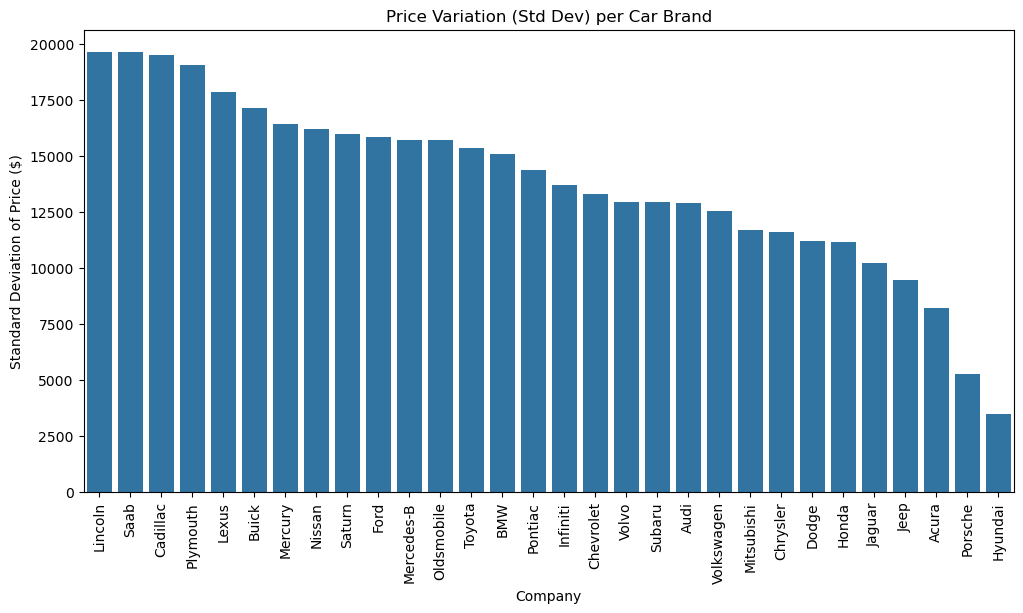

In [17]:
# 2. Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?
price_variation = df.groupby('Company')['Price ($)'].std().sort_values(ascending=False)
print("\n2. Price variation by company (std deviation):")
print(price_variation)

plt.figure(figsize=(12,6))
sns.barplot(x=price_variation.index, y=price_variation.values)
plt.xticks(rotation=90)
plt.title('Price Variation (Std Dev) per Car Brand')
plt.ylabel('Standard Deviation of Price ($)')
plt.show()

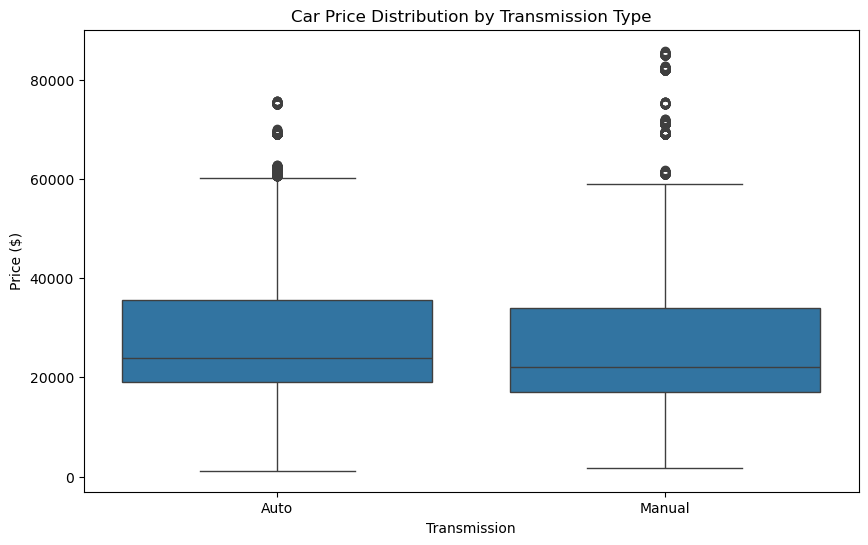

In [18]:
# 3. What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?
plt.figure(figsize=(10,6))
sns.boxplot(x='Transmission', y='Price ($)', data=df)
plt.title('Car Price Distribution by Transmission Type')
plt.show()

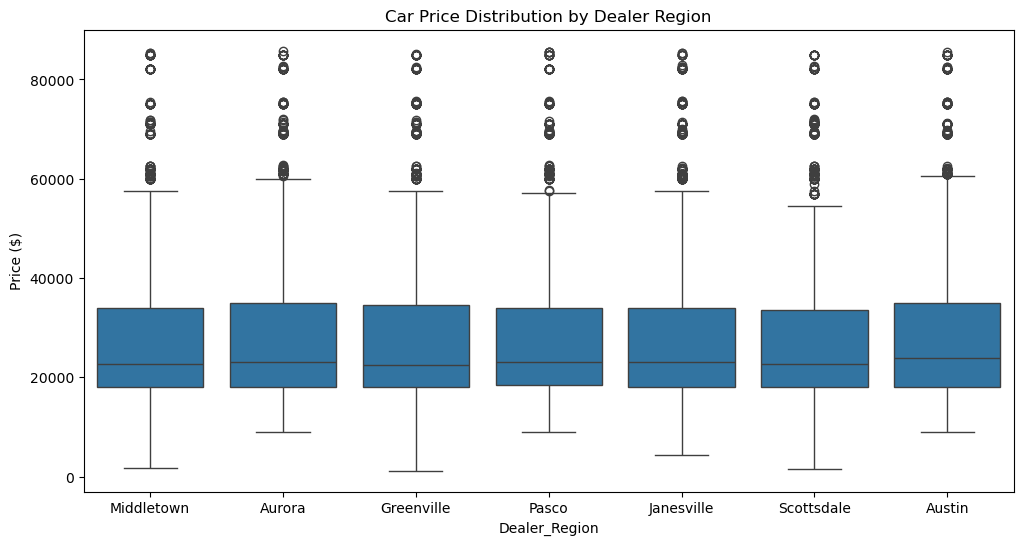

In [19]:
# 4. What is the distribution of car prices across different regions?
plt.figure(figsize=(12,6))
sns.boxplot(x='Dealer_Region', y='Price ($)', data=df)
plt.title('Car Price Distribution by Dealer Region')
plt.show()

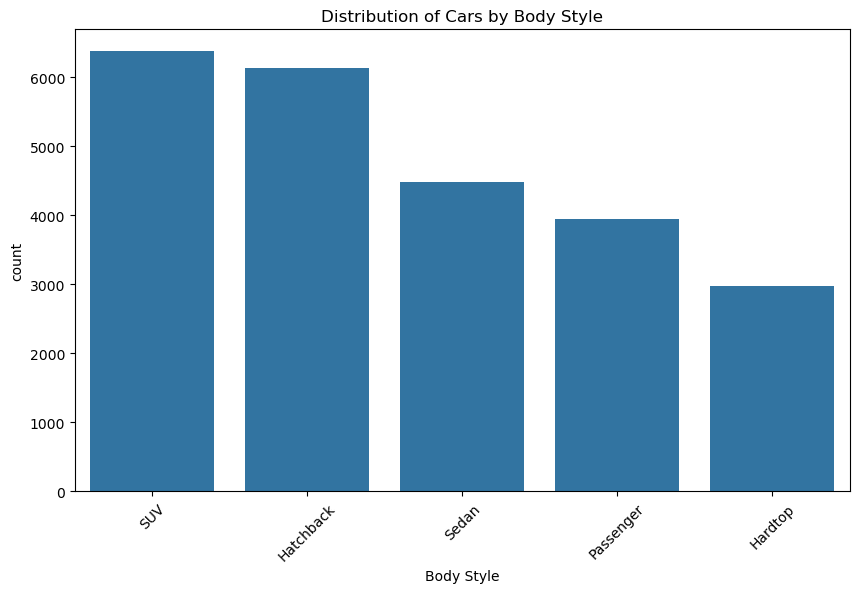

In [20]:
# 5. What is the distribution of cars based on body styles?
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Body Style', order=df['Body Style'].value_counts().index)
plt.title('Distribution of Cars by Body Style')
plt.xticks(rotation=45)
plt.show()

In [21]:
# 6. How does the average selling price of cars vary by customer gender and annual income?
avg_price_gender_income = df.groupby(['Gender'])[['Price ($)', 'Annual Income']].mean()
print("\n Average selling price and annual income by gender:")
print(avg_price_gender_income)


 Average selling price and annual income by gender:
           Price ($)  Annual Income
Gender                             
Female  28277.265270  755973.021339
Male    28039.429407  851184.044207



7. Average price by region:
Dealer_Region
Aurora        28334.626837
Austin        28341.603628
Greenville    28180.819054
Janesville    27833.350955
Middletown    27856.338875
Pasco         28119.039923
Scottsdale    27954.958928
Name: Price ($), dtype: float64

Number of cars sold by region:
Dealer_Region
Austin        4135
Janesville    3821
Scottsdale    3433
Pasco         3131
Aurora        3130
Middletown    3128
Greenville    3128
Name: count, dtype: int64


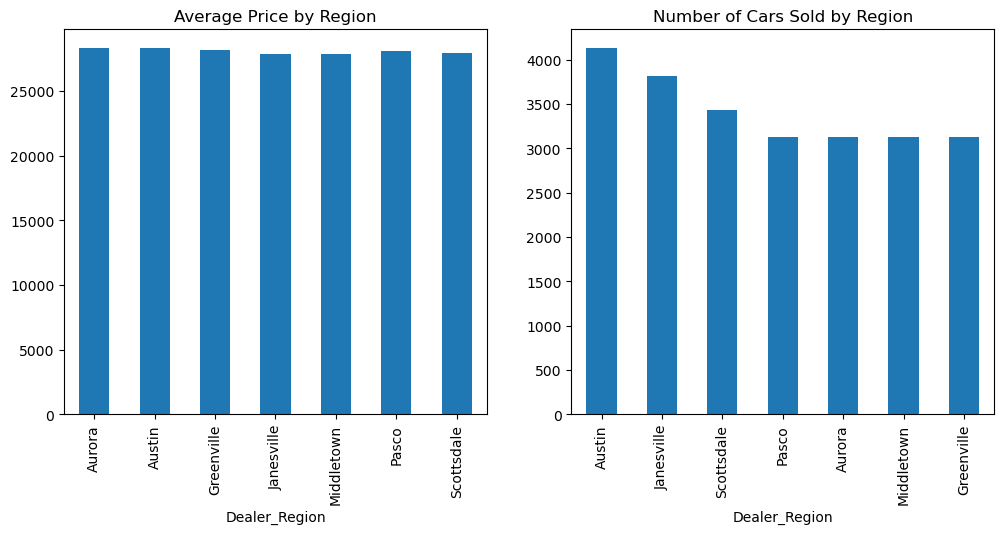

In [22]:
# 7. What is the distribution of car prices by region, and how does the number of cars sold vary by region?
price_region = df.groupby('Dealer_Region')['Price ($)'].mean()
count_region = df['Dealer_Region'].value_counts()

print("\n7. Average price by region:")
print(price_region)
print("\nNumber of cars sold by region:")
print(count_region)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
price_region.plot(kind='bar', title='Average Price by Region')
plt.subplot(1,2,2)
count_region.plot(kind='bar', title='Number of Cars Sold by Region')
plt.show()


8. Average car price by engine type:
Engine
DoubleÂ Overhead Camshaft    28248.525972
Overhead Camshaft            27914.710631
Name: Price ($), dtype: float64


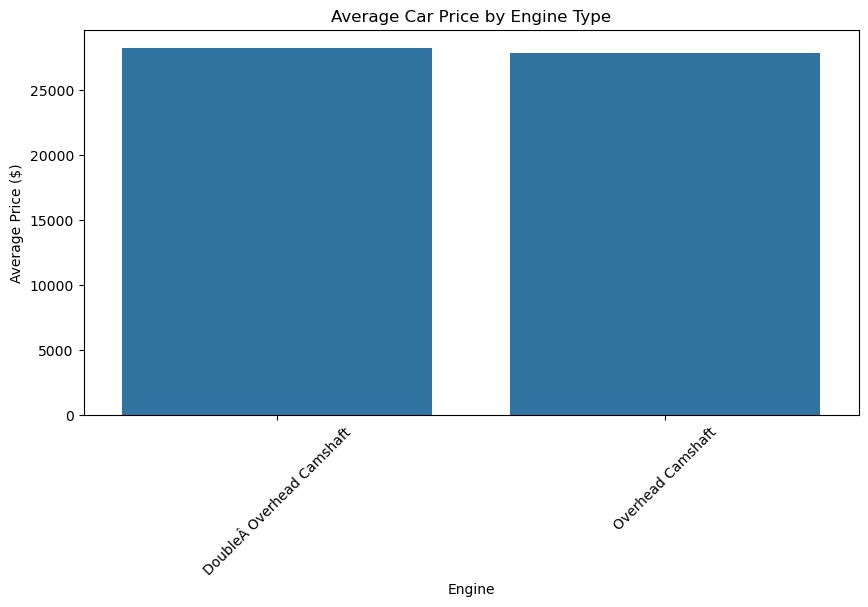

In [23]:
# 8. How does the average car price differ between cars with different engine sizes?
avg_price_engine = df.groupby('Engine')['Price ($)'].mean().sort_values(ascending=False)
print("\n8. Average car price by engine type:")
print(avg_price_engine)

plt.figure(figsize=(10,5))
sns.barplot(x=avg_price_engine.index, y=avg_price_engine.values)
plt.title('Average Car Price by Engine Type')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.show()

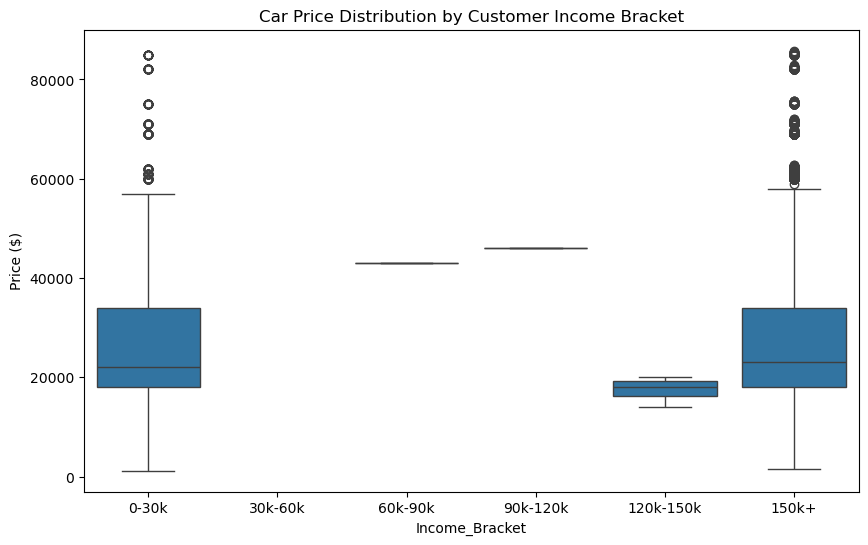

In [24]:
# 9. How do car prices vary based on the customer’s annual income bracket?
# Create income brackets
bins = [0, 30000, 60000, 90000, 120000, 150000, 1e10]
labels = ['0-30k', '30k-60k', '60k-90k', '90k-120k', '120k-150k', '150k+']
df['Income_Bracket'] = pd.cut(df['Annual Income'], bins=bins, labels=labels)

plt.figure(figsize=(10,6))
sns.boxplot(x='Income_Bracket', y='Price ($)', data=df)
plt.title('Car Price Distribution by Customer Income Bracket')
plt.show()


10. Top 5 car models by sales:
Index(['Diamante', 'Silhouette', 'Prizm', 'Passat', 'Ram Pickup'], dtype='object', name='Model')


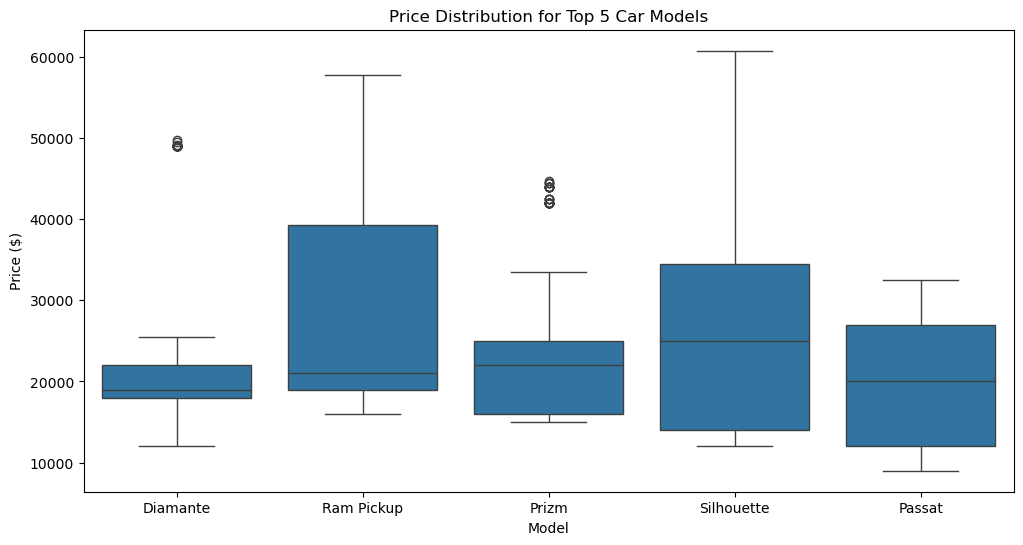

In [25]:
# 10. What are the top 5 car models with the highest number of sales, and how does their price distribution look?
top_models = df['Model'].value_counts().head(5).index
print("\n10. Top 5 car models by sales:")
print(top_models)

plt.figure(figsize=(12,6))
sns.boxplot(x='Model', y='Price ($)', data=df[df['Model'].isin(top_models)])
plt.title('Price Distribution for Top 5 Car Models')
plt.show()

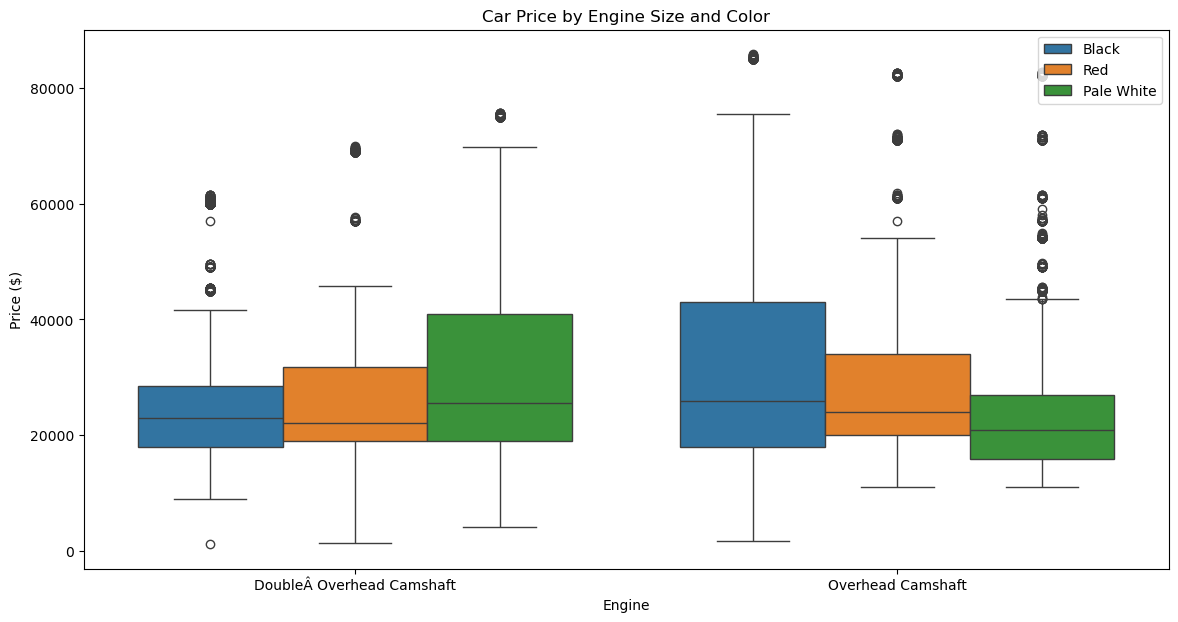


11. Price variation by car color (std deviation):
Color
Red           15519.360962
Black         15286.065976
Pale White    14077.346859
Name: Price ($), dtype: float64


In [26]:
# 11. How does car price vary with engine size across different car colors, and which colors have the highest price variation?
plt.figure(figsize=(14,7))
sns.boxplot(x='Engine', y='Price ($)', hue='Color', data=df)
plt.title('Car Price by Engine Size and Color')
plt.legend(loc='upper right')
plt.show()

color_variation = df.groupby('Color')['Price ($)'].std().sort_values(ascending=False)
print("\n11. Price variation by car color (std deviation):")
print(color_variation)

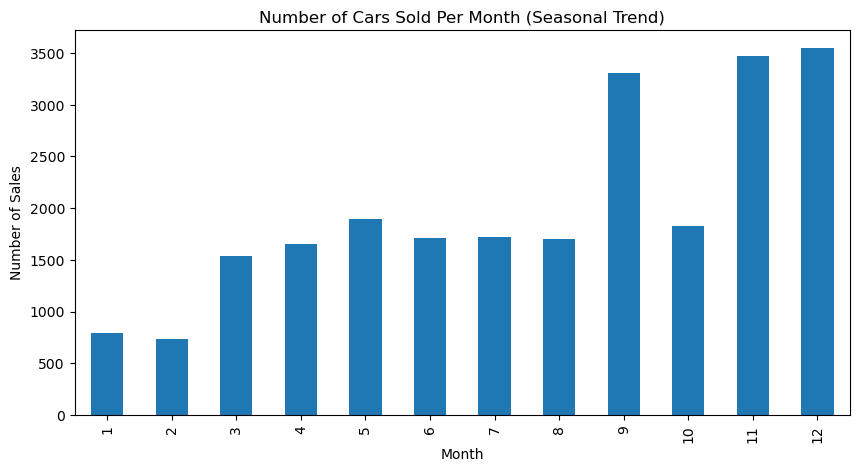

In [27]:
# 12. Is there any seasonal trend in car sales based on the date of sale?
# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month

monthly_sales = df.groupby('Month').size()

plt.figure(figsize=(10,5))
monthly_sales.plot(kind='bar')
plt.title('Number of Cars Sold Per Month (Seasonal Trend)')
plt.xlabel('Month')
plt.ylabel('Number of Sales')
plt.show()

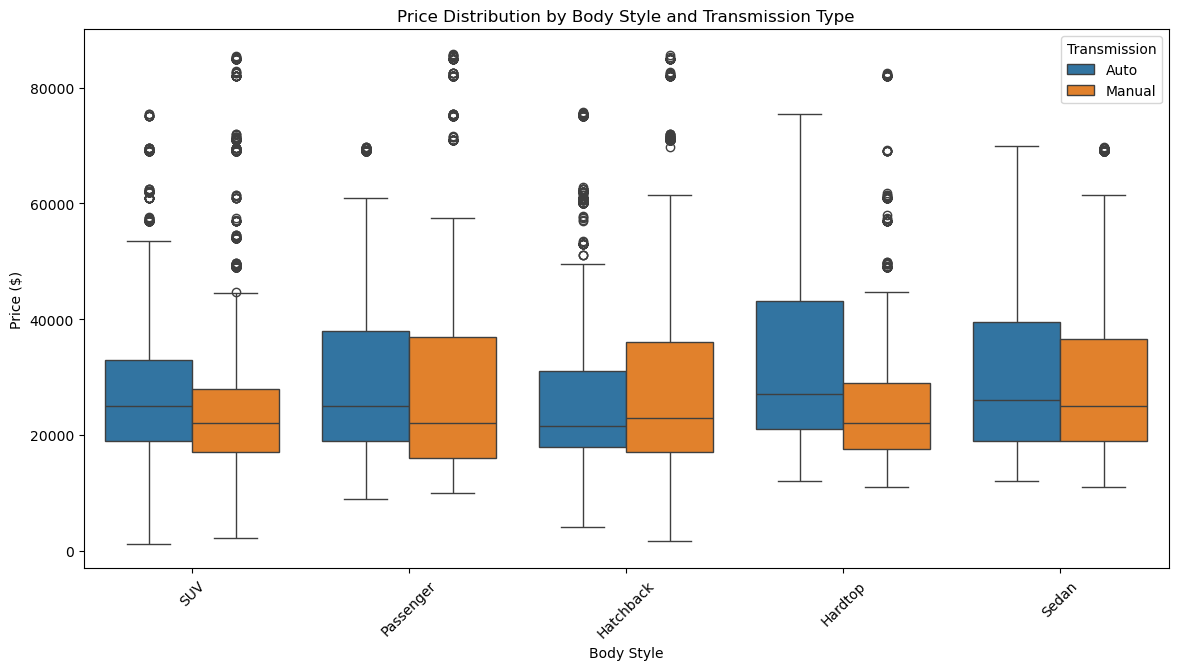

In [28]:
# 13. How does the car price distribution change when considering different combinations of body style and transmission type?
plt.figure(figsize=(14,7))
sns.boxplot(x='Body Style', y='Price ($)', hue='Transmission', data=df)
plt.title('Price Distribution by Body Style and Transmission Type')
plt.xticks(rotation=45)
plt.show()


14. Correlation matrix:
               Price ($)  Engine_Num  Annual Income
Price ($)            NaN         NaN            NaN
Engine_Num           NaN         NaN            NaN
Annual Income        NaN         NaN            NaN


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


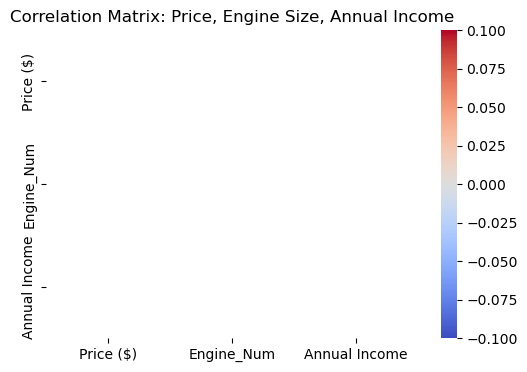

In [29]:
# 14. What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?
# For correlation, convert 'Engine' to numeric approximate values (e.g. 'V6' -> 6, 'I4' -> 4)
def engine_to_num(engine):
    if pd.isnull(engine):
        return None
    if 'V' in engine:
        return int(engine.replace('V', ''))
    elif 'I' in engine:
        return int(engine.replace('I', ''))
    else:
        return None

df['Engine_Num'] = df['Engine'].apply(engine_to_num)

corr_df = df[['Price ($)', 'Engine_Num', 'Annual Income']].dropna()
corr_matrix = corr_df.corr()

print("\n14. Correlation matrix:")
print(corr_matrix)

plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix: Price, Engine Size, Annual Income')
plt.show()


15. Average price by Model and Engine:
Engine    DoubleÂ Overhead Camshaft  Overhead Camshaft
Model                                                 
3-Sep                  37986.380117                NaN
3000GT                 22764.326923       21770.659864
300M                   21394.888889                NaN
323i                   16744.632287       21038.162162
328i                   21069.149606       38676.177215
...                             ...                ...
Viper                  32118.479167       26052.375000
Voyager                22066.026316       33995.678322
Windstar               25145.636364       17100.272727
Wrangler               21145.294737       18742.942029
Xterra                 15940.459459       31072.500000

[154 rows x 2 columns]


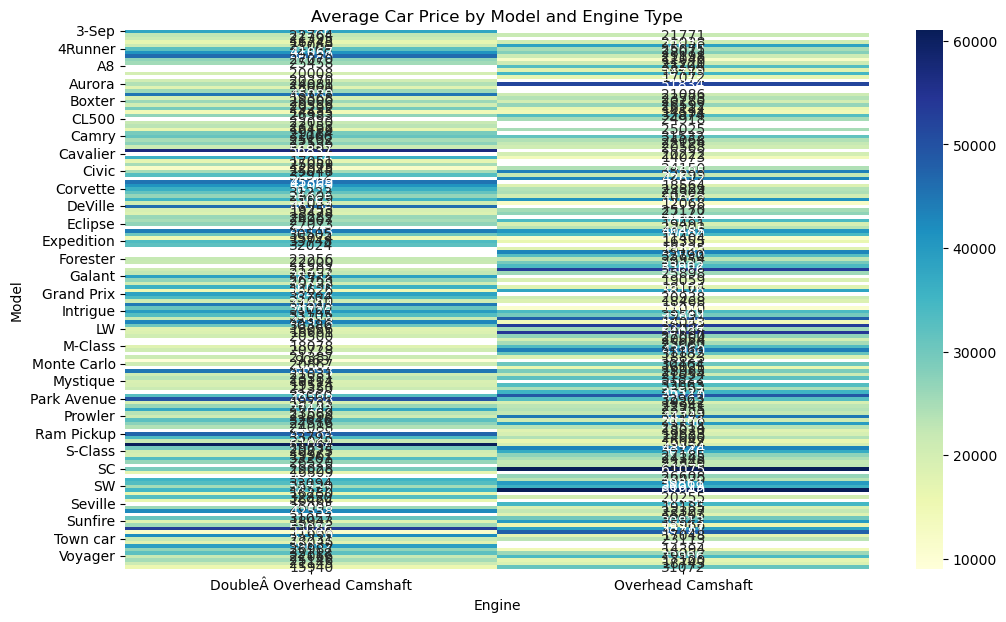

In [30]:
# 15. How does the average car price vary across different car models and engine types?
avg_price_model_engine = df.groupby(['Model', 'Engine'])['Price ($)'].mean().unstack()
print("\n15. Average price by Model and Engine:")
print(avg_price_model_engine)

plt.figure(figsize=(12,7))
sns.heatmap(avg_price_model_engine, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title('Average Car Price by Model and Engine Type')
plt.show()

# EDA-3

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('amazon.csv')

df.head()


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [32]:
# 1. G' What is the average rating for each product categoryk
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')
df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')
df['actual_price'] = pd.to_numeric(df['actual_price'], errors='coerce')
df['discount_percentage'] = pd.to_numeric(df['discount_percentage'], errors='coerce')

print("\n1. Average rating per product category:")
avg_rating_per_category = df.groupby('category')['rating'].mean().sort_values(ascending=False)
print(avg_rating_per_category)



1. Average rating per product category:
category
Computers&Accessories|Tablets                                                                                    4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters                                         4.5
Electronics|Cameras&Photography|Accessories|Film                                                                 4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                                                     4.5
OfficeProducts|OfficeElectronics|Calculators|Basic                                                               4.5
                                                                                                                ... 
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                               3.6
Electronics|HomeTheater,TV&Video|Accessories|3DGlasses                                                           3.5
Computers&Acce

In [33]:
# 2. What are the top rating_count products by categoryk
print("\n2. Top rating_count products by category:")
top_rating_count = df.groupby('category')['rating_count'].max().sort_values(ascending=False)
print(top_rating_count)


2. Top rating_count products by category:
category
Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cleaning&Ironing|Vacuums&FloorCare|Vacuums|HandheldVacuums                     992.0
Electronics|GeneralPurposeBatteries&BatteryChargers|DisposableBatteries                                                   989.0
Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|Kettles&HotWaterDispensers|Kettle&ToasterSets                  976.0
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables                                         974.0
Home&Kitchen|Heating,Cooling&AirQuality|WaterHeaters&Geysers|StorageWaterHeaters                                          959.0
                                                                                                                          ...  
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens          NaN
OfficeProducts|OfficePaperProducts|Paper|Stationery|

In [34]:

# 3. What is the distribution of discounted prices vs. actual prices?




In [35]:
# 4. What is the average discount percentage by category?



In [36]:
# 5.  What are the most popular product names
print("\n5. Most popular product names (top 10 by rating_count):")
popular_products = df.groupby('product_name')['rating_count'].sum().sort_values(ascending=False).head(10)
print(popular_products)


5. Most popular product names (top 10 by rating_count):
product_name
Duracell USB Lightning Apple Certified (Mfi) Braided Sync & Charge Cable For Iphone, Ipad And Ipod. Fast Charging Lightning Cable, 3.9 Feet (1.2M) - Black                                            2445.0
Zoul USB C 60W Fast Charging 3A 6ft/2M Long Type C Nylon Braided Data Cable Quick Charger Cable QC 3.0 for Samsung Galaxy M31S M30 S10 S9 S20 Plus, Note 10 9 8, A20e A40 A50 A70 (2M, Grey)          1948.0
Ambrane 2 in 1 Type-C & Micro USB Cable with 60W / 3A Fast Charging, 480 mbps High Data, PD Technology & Quick Charge 3.0, Compatible with All Type-C & Micro USB Devices (ABDC-10, Black)            1806.0
Wecool Unbreakable 3 in 1 Charging Cable with 3A Speed, Fast Charging Multi Purpose Cable 1.25 Mtr Long, Type C cable, Micro Usb Cable and Cable for iPhone, White                                    1312.0
Sounce 65W OnePlus Dash Warp Charge Cable, 6.5A Type-C to USB C PD Data Sync Fast Charging Cable Compatible wi

In [37]:
# 6. t' What are the most popular product keywords
print("\n6. Most popular product keywords (from review titles and contents):")
# This is a complex NLP task; for now, let's extract the top frequent words from review_title
from collections import Counter
import re

all_words = ' '.join(df['review_title'].dropna().astype(str)).lower()
words = re.findall(r'\b\w+\b', all_words)
word_counts = Counter(words)
most_common_keywords = word_counts.most_common(10)
print(most_common_keywords)


6. Most popular product keywords (from review titles and contents):
[('good', 3929), ('product', 2425), ('for', 1467), ('is', 927), ('it', 926), ('nice', 895), ('the', 867), ('and', 823), ('quality', 761), ('not', 747)]


In [38]:

# 7. ' What are the most popular product reviews
print("\n7. Most frequent review titles (top 10):")
top_review_titles = df['review_title'].value_counts().head(10)
print(top_review_titles)


7. Most frequent review titles (top 10):
review_title
Worked on iPhone 7 and didn’t work on XR,Good one,Dull Physical Looks,Just Buy it,Go for it,About the product,Get charging cable at the price,Working well.                                                                                                                                     10
Satisfied,Charging is really fast,Value for money,Product review,Good quality,Good product,Good Product,As of now seems good                                                                                                                                                                     8
Phone, camera, heating - works for me, may not for all,Good Mobile,Good but not excellent under this budget,Worth the price at 9499,Ok type phone... but unable to make videocall within same service provider.,Phone review,Budget king,Battery backup is good                                  8
Good product,Good one,Nice,Really nice product,Very first time change,Go

In [39]:
# 8.  What is the correlation between discounted_price and rating
print("\n8. Correlation between discounted_price and rating:")
correlation = df[['discounted_price', 'rating']].corr().loc['discounted_price', 'rating']
print(correlation)


8. Correlation between discounted_price and rating:
nan


In [40]:
# 9. ' What are the Top 5 categories based on the highest ratingsk
print("\n9. Top 5 categories with highest average ratings:")
top5_categories = avg_rating_per_category.head(5)
print(top5_categories)


9. Top 5 categories with highest average ratings:
category
Computers&Accessories|Tablets                                               4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters    4.5
Electronics|Cameras&Photography|Accessories|Film                            4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                4.5
OfficeProducts|OfficeElectronics|Calculators|Basic                          4.5
Name: rating, dtype: float64


In [41]:
# 10.  Identify any potential areas for improvement or optimization based on the data analysis
print("\n10. Areas for improvement or optimization based on EDA:")

print("""
- There might be categories with low average ratings; these products could be improved.
- Some products show very high discount percentages; investigate if this affects ratings.
- Review titles and contents often repeat certain keywords; improving product descriptions with popular keywords might boost engagement.
- Correlation between discounted price and rating is {} indicating {} relationship.
- Some products have very low rating_count despite good ratings; marketing efforts could improve visibility.
""".format(round(correlation, 3), 
           "a weak positive" if correlation > 0 else "a weak negative" if correlation < 0 else "no"))


10. Areas for improvement or optimization based on EDA:

- There might be categories with low average ratings; these products could be improved.
- Some products show very high discount percentages; investigate if this affects ratings.
- Review titles and contents often repeat certain keywords; improving product descriptions with popular keywords might boost engagement.
- Correlation between discounted price and rating is nan indicating no relationship.
- Some products have very low rating_count despite good ratings; marketing efforts could improve visibility.



# EDA_4

In [42]:
# 1. Read the dataframe, check null values, handle them, check duplicates and handle them
import pandas as pd

df = pd.read_csv('spotify.csv')
print("Null values per column:\n", df.isnull().sum())

# Drop rows with null values if any
df = df.dropna()

# Check duplicates
print("Number of duplicate rows:", df.duplicated().sum())

# Drop duplicates
df = df.drop_duplicates()


Null values per column:
 Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64
Number of duplicate rows: 27


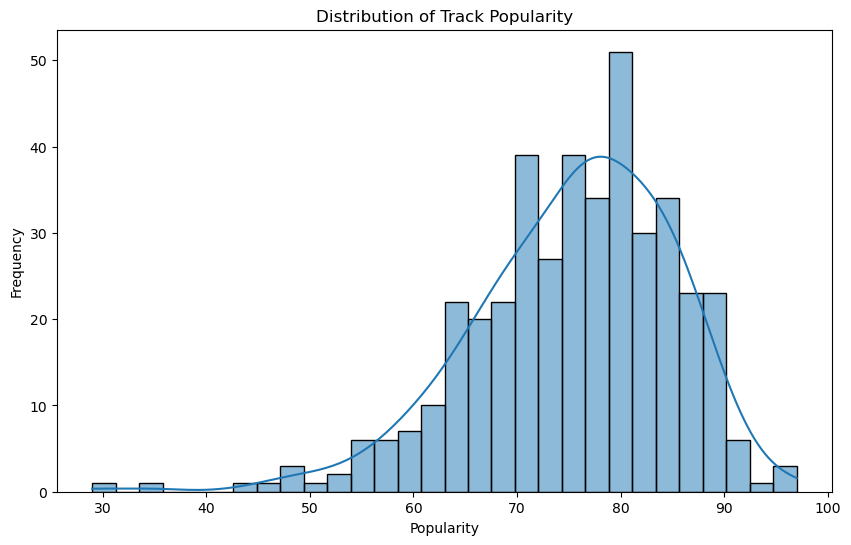

In [43]:
# 2. What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df['Popularity'], bins=30, kde=True)
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()


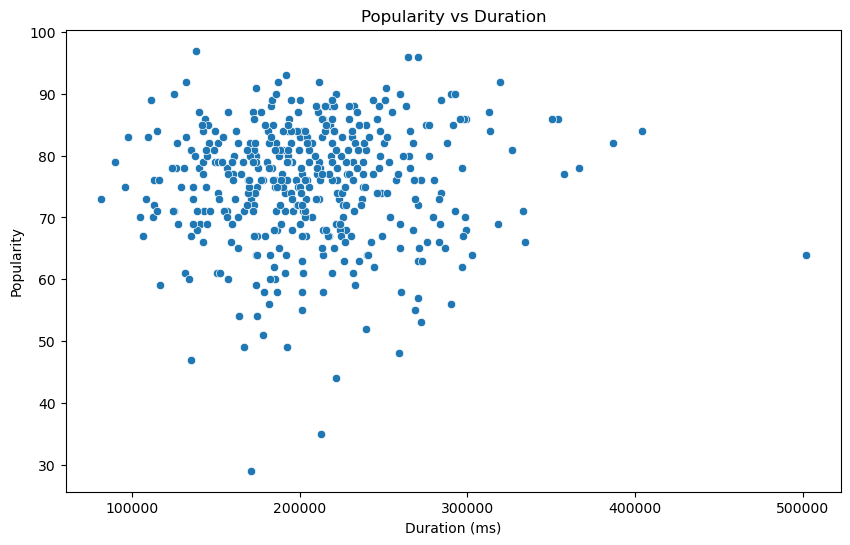

In [44]:
# 3. Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Duration (ms)', y='Popularity')
plt.title('Popularity vs Duration')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.show()


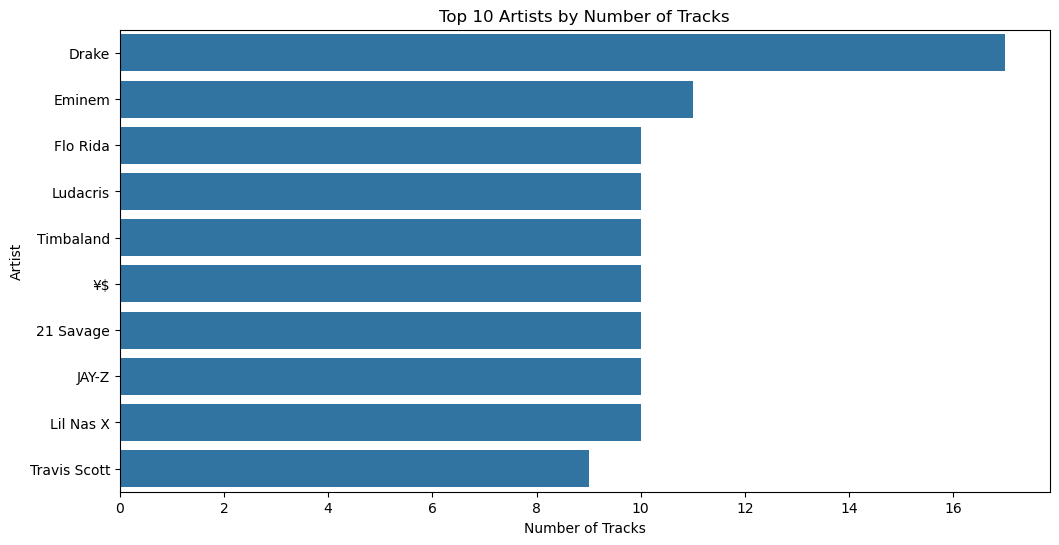

In [45]:
# 4. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot
top_artists = df['Artist'].value_counts().nlargest(10).index

plt.figure(figsize=(12,6))
sns.countplot(data=df[df['Artist'].isin(top_artists)], y='Artist', order=top_artists)
plt.title('Top 10 Artists by Number of Tracks')
plt.xlabel('Number of Tracks')
plt.ylabel('Artist')
plt.show()


In [46]:
# 5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each
least_popular_tracks = df.nsmallest(5, 'Popularity')[['Artist', 'Track Name', 'Popularity']]
print(least_popular_tracks)


             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47
407     Wyclef Jean      911 (feat. Mary J. Blige)          48


In [47]:
# 6. Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist
top5_artists = df['Artist'].value_counts().nlargest(5).index
avg_popularity_top5 = df[df['Artist'].isin(top5_artists)].groupby('Artist')['Popularity'].mean().sort_values(ascending=False)
print(avg_popularity_top5)


Artist
Eminem       83.636364
Drake        82.882353
Flo Rida     78.000000
Timbaland    69.000000
Ludacris     63.000000
Name: Popularity, dtype: float64


In [48]:
# 7. For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist
most_popular_tracks_top5 = df[df['Artist'].isin(top5_artists)].groupby('Artist').apply(lambda x: x.loc[x['Popularity'].idxmax()])[['Artist', 'Track Name', 'Popularity']]
print(most_popular_tracks_top5)


              Artist                               Track Name  Popularity
Artist                                                                   
Drake          Drake  Rich Baby Daddy (feat. Sexyy Red & SZA)          92
Eminem        Eminem                               Without Me          90
Flo Rida    Flo Rida                       Low (feat. T-Pain)          84
Ludacris    Ludacris                             My Chick Bad          67
Timbaland  Timbaland                            The Way I Are          85


C:\Users\arunp\AppData\Local\Temp\ipykernel_19040\976363862.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  most_popular_tracks_top5 = df[df['Artist'].isin(top5_artists)].groupby('Artist').apply(lambda x: x.loc[x['Popularity'].idxmax()])[['Artist', 'Track Name', 'Popularity']]


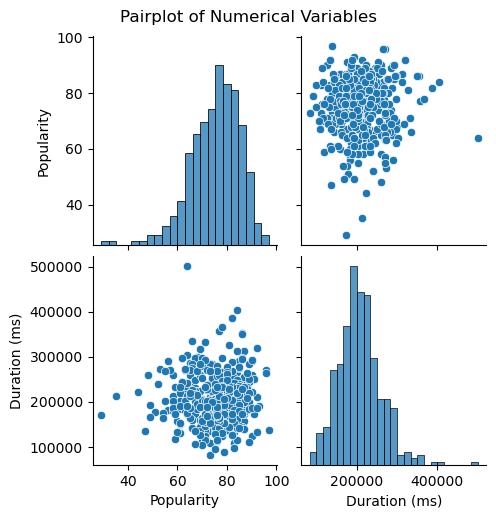

In [49]:
# 8. Visualize relationships between multiple numerical variables simultaneously using a pair plot
sns.pairplot(df[['Popularity', 'Duration (ms)']])
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()


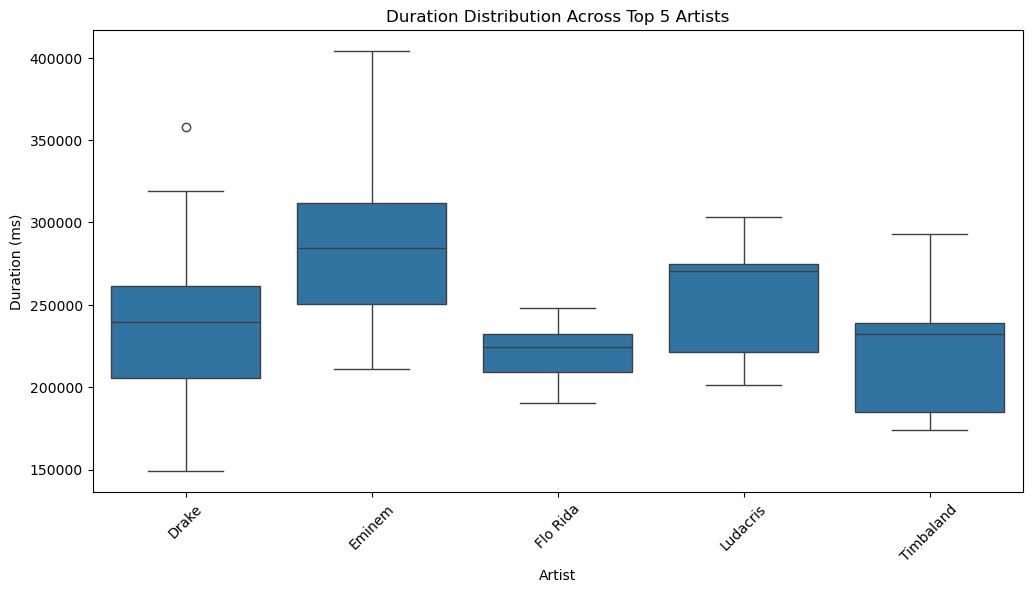

In [50]:
# 9. Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot
plt.figure(figsize=(12,6))
sns.boxplot(data=df[df['Artist'].isin(top5_artists)], x='Artist', y='Duration (ms)')
plt.title('Duration Distribution Across Top 5 Artists')
plt.xticks(rotation=45)
plt.show()


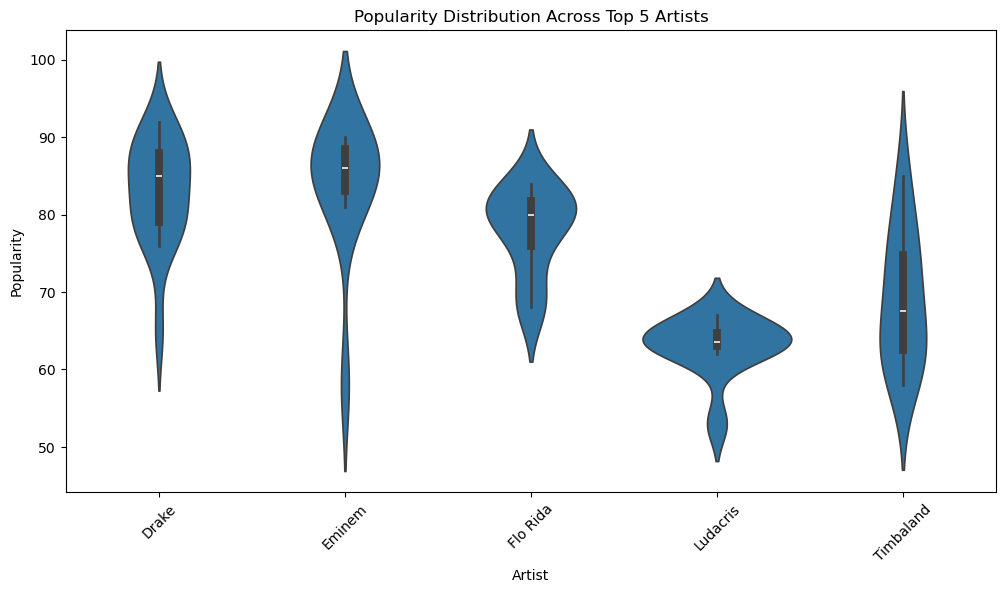

In [51]:
# 10. How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot
plt.figure(figsize=(12,6))
sns.violinplot(data=df[df['Artist'].isin(top5_artists)], x='Artist', y='Popularity')
plt.title('Popularity Distribution Across Top 5 Artists')
plt.xticks(rotation=45)
plt.show()
